# Linear Regression

In [1]:
DATASET_FILE = "../output/data/dataset.joblib"
OUTPUT_PATH = "../output/data/mlr"

In [2]:
from pathlib import Path
from dataclasses import dataclass
from numpy import sqrt
from pandas import DataFrame
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from matplotlib import font_manager, pyplot as plt
from joblib import load, dump

from dataset_type import Dataset

font_prop = font_manager.FontProperties(fname="../submodules/sarabun-font/fonts/Sarabun-Regular.ttf")

In [3]:
DATASET_FILE = Path(DATASET_FILE).resolve()
OUTPUT_PATH = Path(OUTPUT_PATH).resolve()
OUTPUT_PATH.mkdir(parents=True, exist_ok=True)

assert DATASET_FILE.is_file()

In [4]:
@dataclass
class Result:
    station: str
    mae: float
    mse: float
    rmse: float
    r2: float

datasets: dict[str, Dataset] = load(DATASET_FILE)
results: list[Result] = []

Station: ป่าสัก3สถานี นครหลวง 2558-2563
Mean Absolute Error (MAE): 0.6419
Mean Squared Error (MSE): 0.5941
Root Mean Square Error (RMSE): 0.7708
R^2 Score: 0.3798


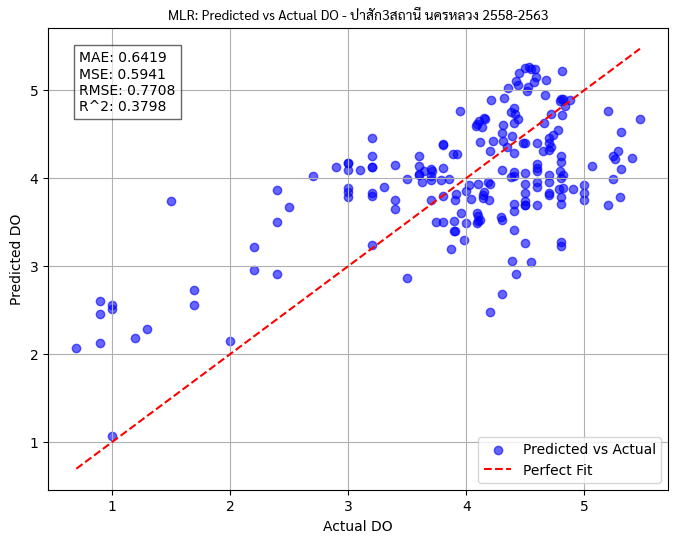

Station: ป่าสัก3สถานี แก่งคอย 2558-2563
Mean Absolute Error (MAE): 0.3931
Mean Squared Error (MSE): 0.2649
Root Mean Square Error (RMSE): 0.5147
R^2 Score: 0.6285


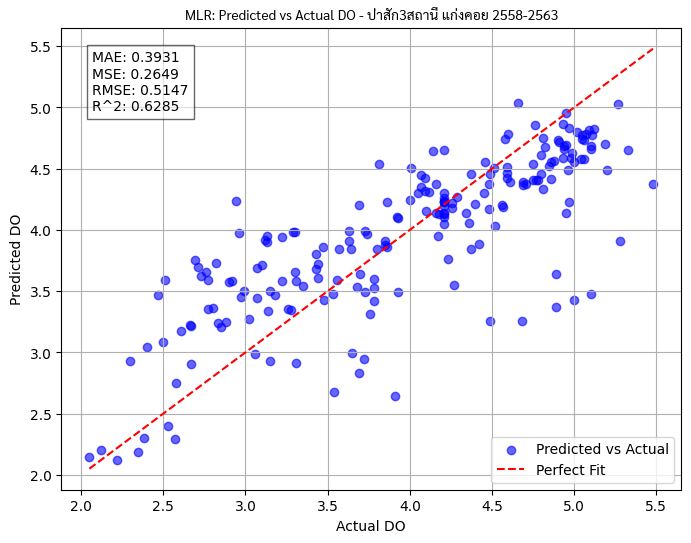

Station: ป่าสัก3สถานี เสาไห้ 2558-2563
Mean Absolute Error (MAE): 0.3932
Mean Squared Error (MSE): 0.2722
Root Mean Square Error (RMSE): 0.5218
R^2 Score: -0.0535


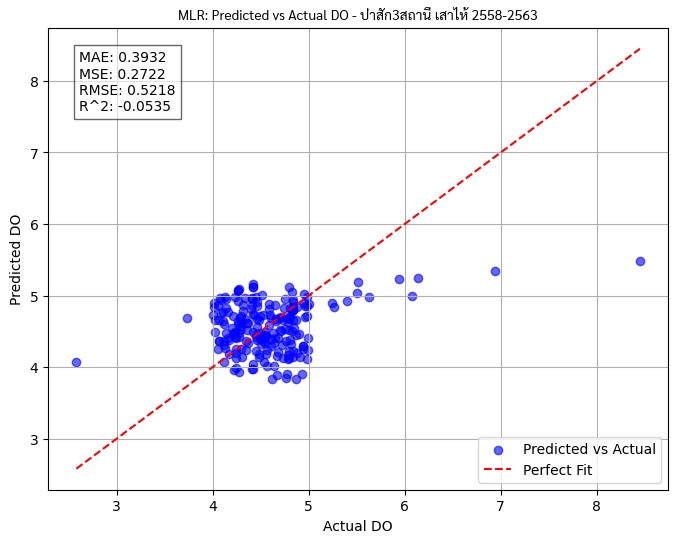

Station: ยม สุโขทัย 2558-2563
Mean Absolute Error (MAE): 1.1486
Mean Squared Error (MSE): 2.9003
Root Mean Square Error (RMSE): 1.7030
R^2 Score: 0.2477


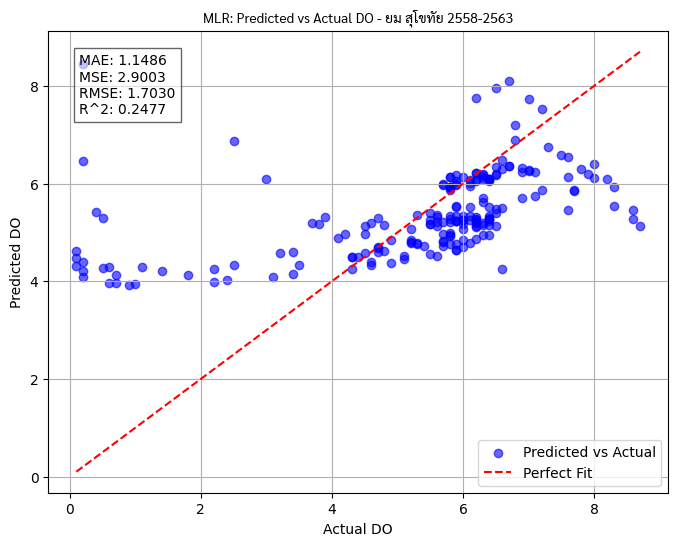

Station: ยม สามง่าม 2558-2563
Mean Absolute Error (MAE): 0.7025
Mean Squared Error (MSE): 0.9732
Root Mean Square Error (RMSE): 0.9865
R^2 Score: 0.8160


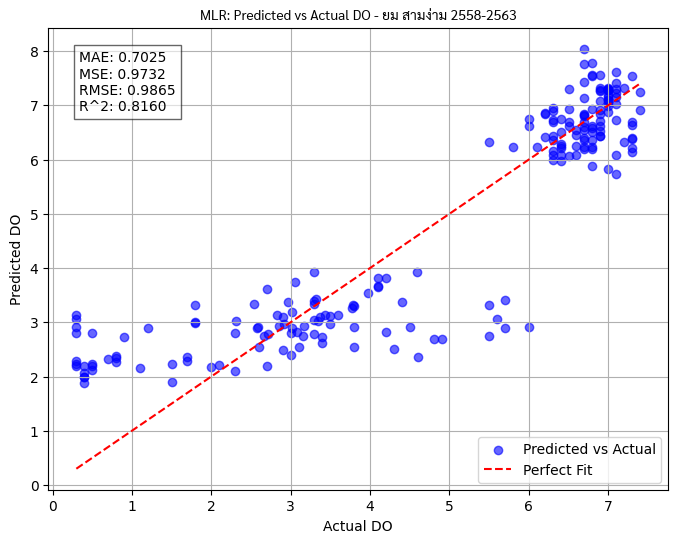

Station: ยม โพทะเล 2558-2563
Mean Absolute Error (MAE): 0.4631
Mean Squared Error (MSE): 0.3393
Root Mean Square Error (RMSE): 0.5825
R^2 Score: 0.3648


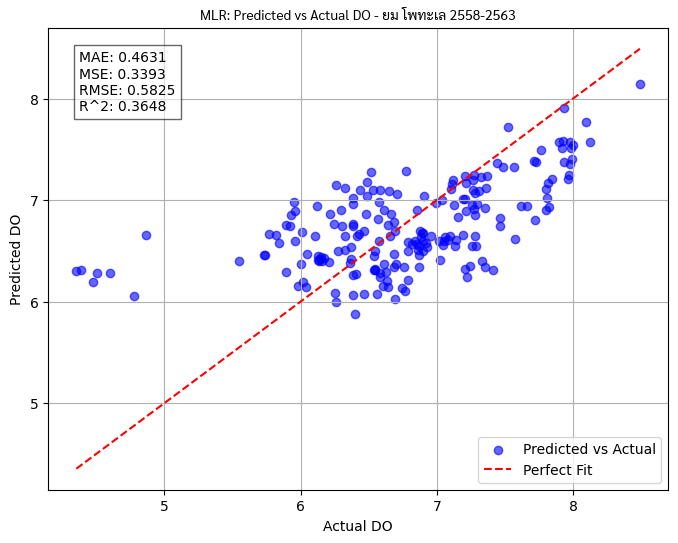

Station: วัง เกาะคา 2558-2563
Mean Absolute Error (MAE): 1.0428
Mean Squared Error (MSE): 1.6382
Root Mean Square Error (RMSE): 1.2799
R^2 Score: 0.4884


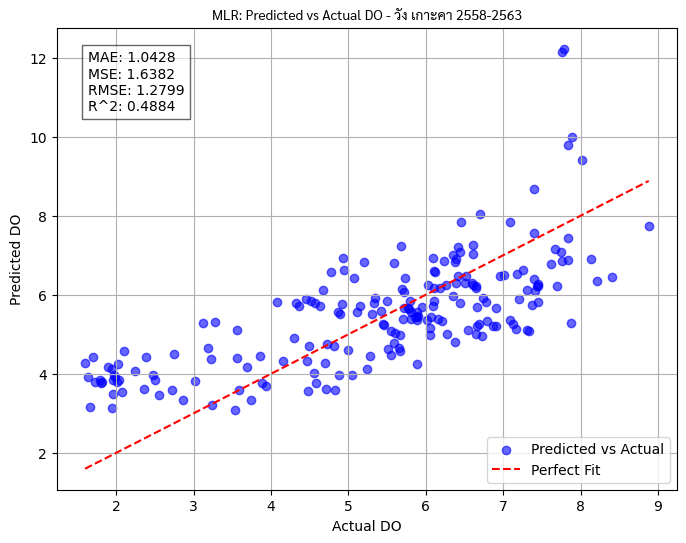

Station: แม่น้ำท่าจีน กระทุ่มแบน 2558-2563
Mean Absolute Error (MAE): 0.1126
Mean Squared Error (MSE): 0.0258
Root Mean Square Error (RMSE): 0.1606
R^2 Score: 0.0902


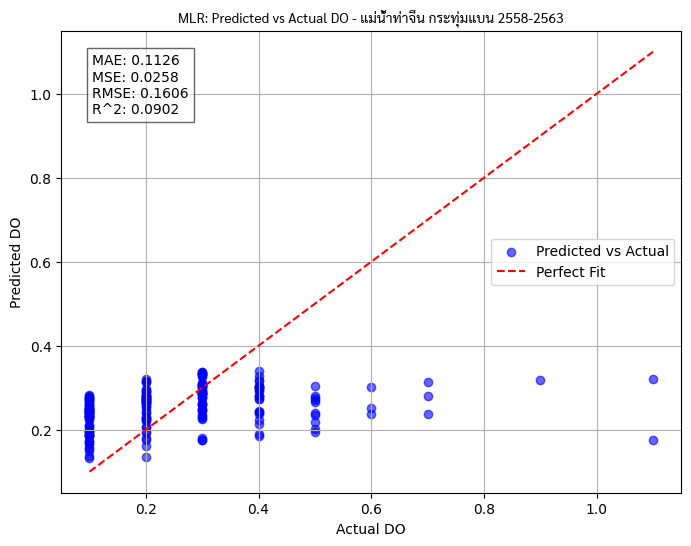

Station: แม่น้ำท่าจีน บางเลน 2558-2563
Mean Absolute Error (MAE): 0.1121
Mean Squared Error (MSE): 0.0226
Root Mean Square Error (RMSE): 0.1504
R^2 Score: 0.7519


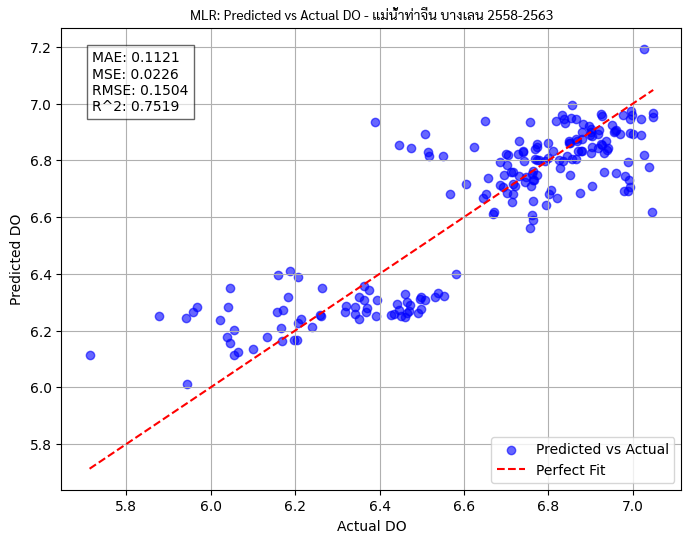

Station: แม่น้ำท่าจีน สองพี่น้อง 2558-2563
Mean Absolute Error (MAE): 0.1856
Mean Squared Error (MSE): 0.0528
Root Mean Square Error (RMSE): 0.2297
R^2 Score: 0.5477


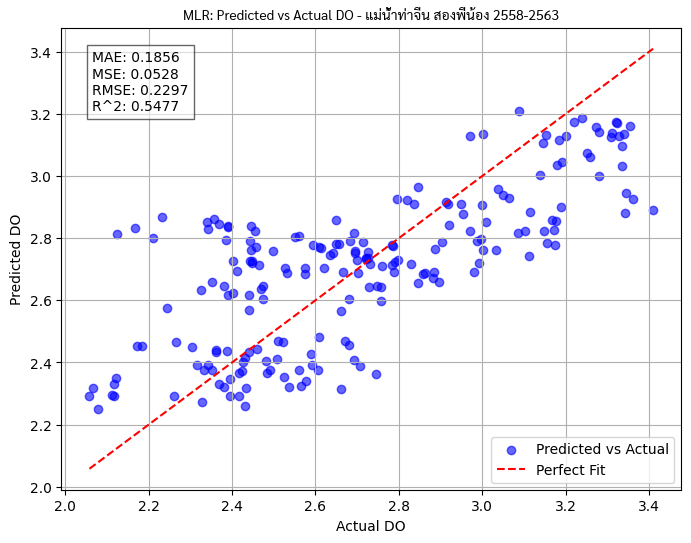

Station: แม่น้ำท่าจีน นครชัยศรี 2558-2563
Mean Absolute Error (MAE): 0.5890
Mean Squared Error (MSE): 0.4834
Root Mean Square Error (RMSE): 0.6952
R^2 Score: 0.0976


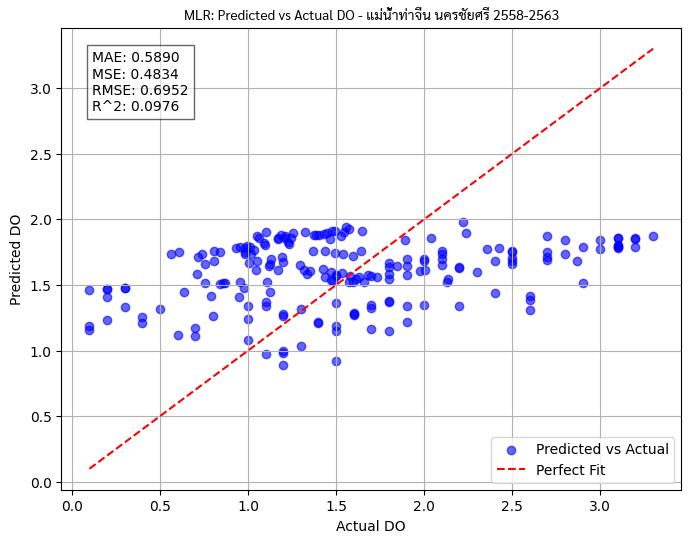

Station: แม่น้ำท่าจีน หันคา 2558-2563
Mean Absolute Error (MAE): 0.2526
Mean Squared Error (MSE): 0.1031
Root Mean Square Error (RMSE): 0.3211
R^2 Score: 0.5961


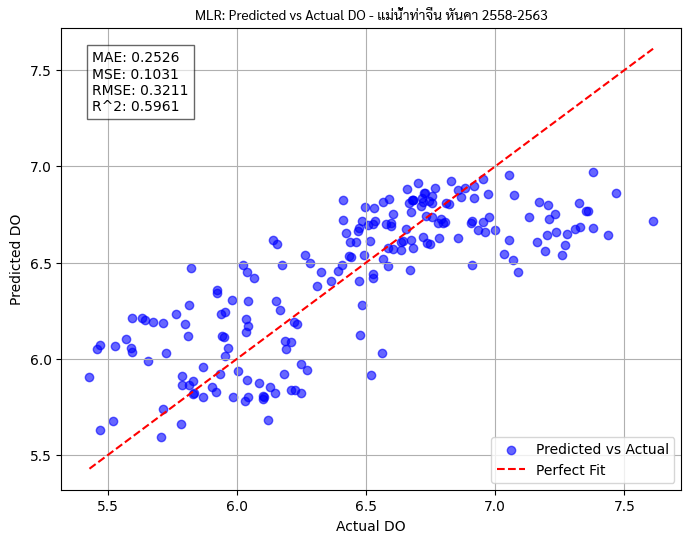

Station: แม่น้ำท่าจีน สุพรรณบุรี 2558-2563
Mean Absolute Error (MAE): 0.3513
Mean Squared Error (MSE): 0.1903
Root Mean Square Error (RMSE): 0.4363
R^2 Score: 0.2160


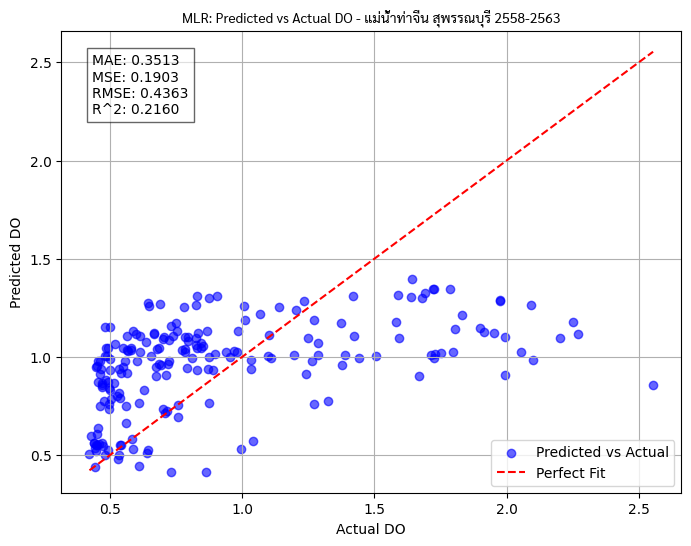

Station: แม่น้ำท่าจีน สามชุก 2558-2563
Mean Absolute Error (MAE): 0.5145
Mean Squared Error (MSE): 0.4190
Root Mean Square Error (RMSE): 0.6473
R^2 Score: 0.3192


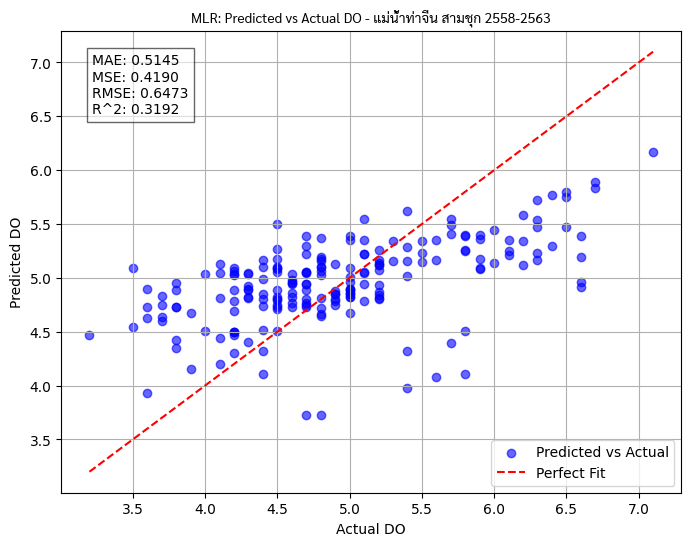

Station: ปิง เชียงใหม่ 2558-2563
Mean Absolute Error (MAE): 1.0283
Mean Squared Error (MSE): 1.7861
Root Mean Square Error (RMSE): 1.3365
R^2 Score: 0.0365


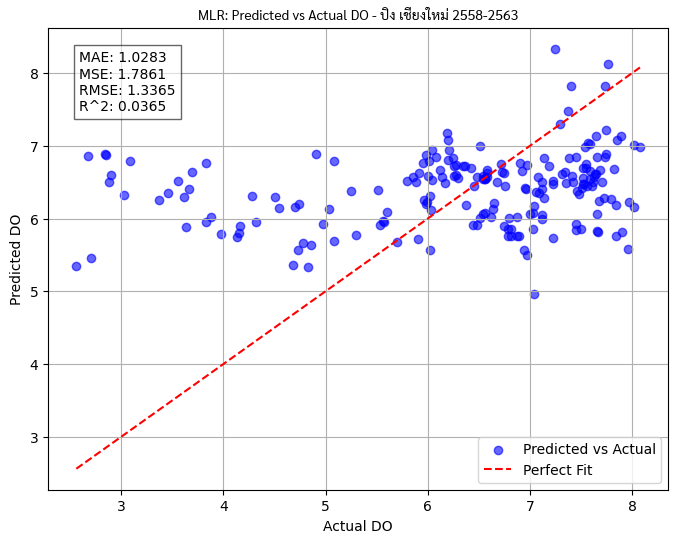

Station: ปิง กำแพงเพชร 2558-2563
Mean Absolute Error (MAE): 0.2430
Mean Squared Error (MSE): 0.0913
Root Mean Square Error (RMSE): 0.3022
R^2 Score: 0.2592


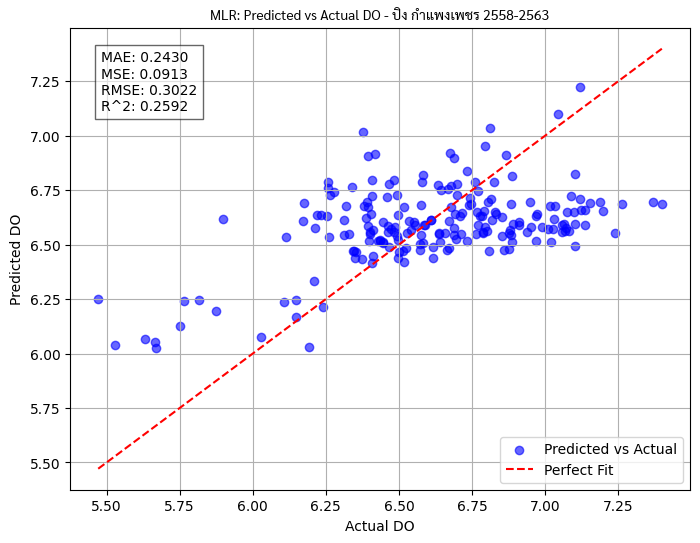

Station: น่าน อุตรดิตถ์ 2558-2563
Mean Absolute Error (MAE): 0.1944
Mean Squared Error (MSE): 0.0681
Root Mean Square Error (RMSE): 0.2610
R^2 Score: 0.2672


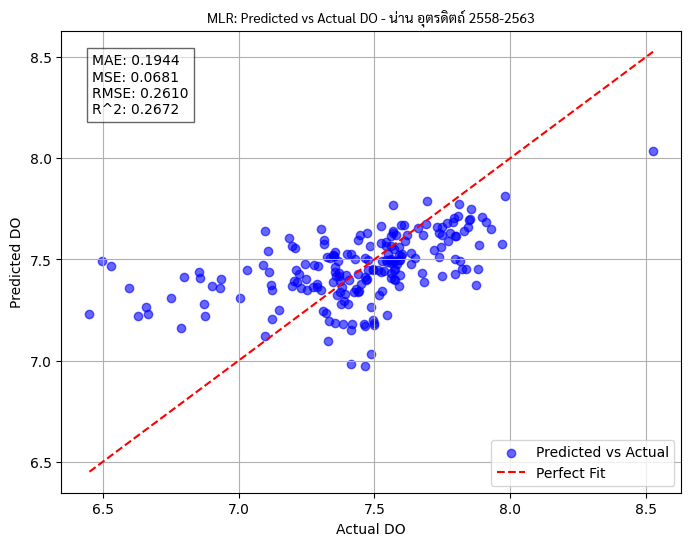

Station: น่าน น่าน 2558-2563
Mean Absolute Error (MAE): 0.3751
Mean Squared Error (MSE): 0.2372
Root Mean Square Error (RMSE): 0.4870
R^2 Score: 0.2417


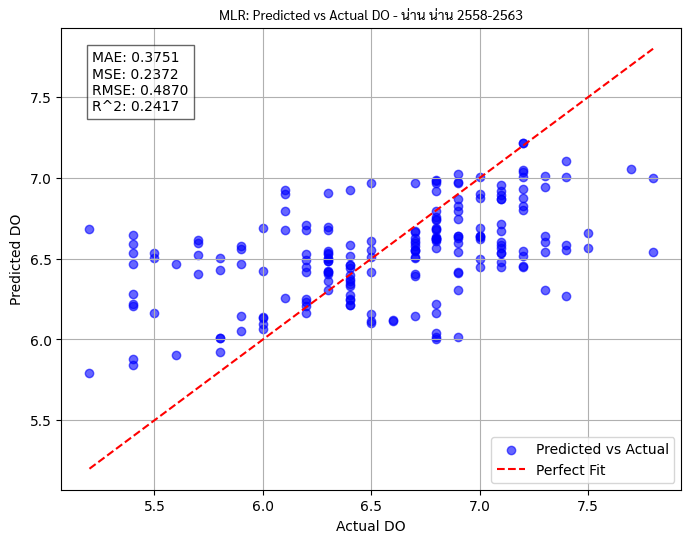

Station: น่าน พิษณุโลก 2558-2563
Mean Absolute Error (MAE): 0.3697
Mean Squared Error (MSE): 0.1892
Root Mean Square Error (RMSE): 0.4350
R^2 Score: 0.4842


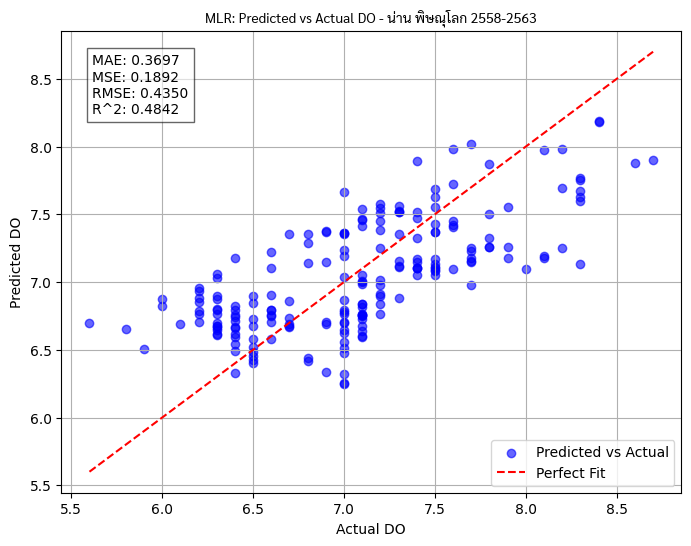

In [5]:
for station, dataset in datasets.items():
    model = LinearRegression()
    model.fit(dataset.X_train, dataset.y_train)

    y_pred = model.predict(dataset.X_test)

    mae = mean_absolute_error(dataset.y_test, y_pred)
    mse = mean_squared_error(dataset.y_test, y_pred)
    rmse = sqrt(mse)
    r2 = r2_score(dataset.y_test, y_pred)

    print(f"Station: {station}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Square Error (RMSE): {rmse:.4f}")
    print(f"R^2 Score: {r2:.4f}")

    results.append(Result(station, mae, mse, rmse, r2))

    dump(model, OUTPUT_PATH / f"{station}_model.joblib")

    plt.figure(figsize=(8,6), facecolor="white")
    plt.scatter(dataset.y_test, y_pred, color="blue", alpha=0.6, label="Predicted vs Actual")
    plt.plot([min(dataset.y_test), max(dataset.y_test)], [min(dataset.y_test), max(dataset.y_test)], color="red", linestyle="--", label="Perfect Fit")
    plt.xlabel("Actual DO")
    plt.ylabel("Predicted DO")
    plt.title(f"MLR: Predicted vs Actual DO - {station}", fontproperties=font_prop)
    plt.legend()
    plt.grid()

    textstr = f"MAE: {mae:.4f}\nMSE: {mse:.4f}\nRMSE: {rmse:.4f}\nR^2: {r2:.4f}"
    plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10, verticalalignment="top", bbox=dict(facecolor="white", alpha=0.6))

    plt.savefig(OUTPUT_PATH / f"mlr-pred-actual-{station}.png")
    plt.show()


In [6]:
results_df = DataFrame([result.__dict__ for result in results])
results_df.to_csv(OUTPUT_PATH / "results.csv", index=False)